## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')
df_pen = df_pen.dropna()

In [3]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

## Data Pre-processing

In [4]:
X = pd.get_dummies(X, drop_first=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=46)

In [6]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Multi-Class Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

## GridSearch

In [10]:
penalty = ['l1', 'l2']

C = np.logspace(0, 4, 10)

In [11]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [12]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [13]:
grid_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l1'}

## Metrics

In [14]:
y_pred = grid_model.predict(X_test)

In [15]:
metrics.accuracy_score(y_test,y_pred)

0.6119402985074627

In [16]:
metrics.confusion_matrix(y_test,y_pred)

array([[22,  8,  0],
       [ 2, 15,  4],
       [ 5,  7,  4]], dtype=int64)

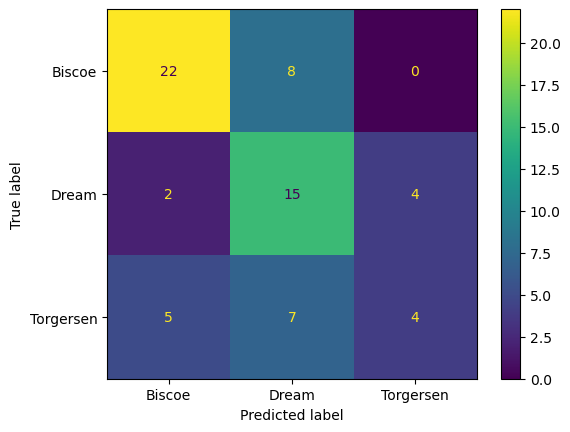

In [17]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_model.classes_).plot()

In [18]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.76      0.73      0.75        30
       Dream       0.50      0.71      0.59        21
   Torgersen       0.50      0.25      0.33        16

    accuracy                           0.61        67
   macro avg       0.59      0.57      0.56        67
weighted avg       0.62      0.61      0.60        67



In [19]:
## Codigo copiado directamente desde la documentacion de scikit-learn
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
#         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
        ax.plot(fpr[i], tpr[i], label= f'ROC curve (area = {roc_auc[i]}) for label {i}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

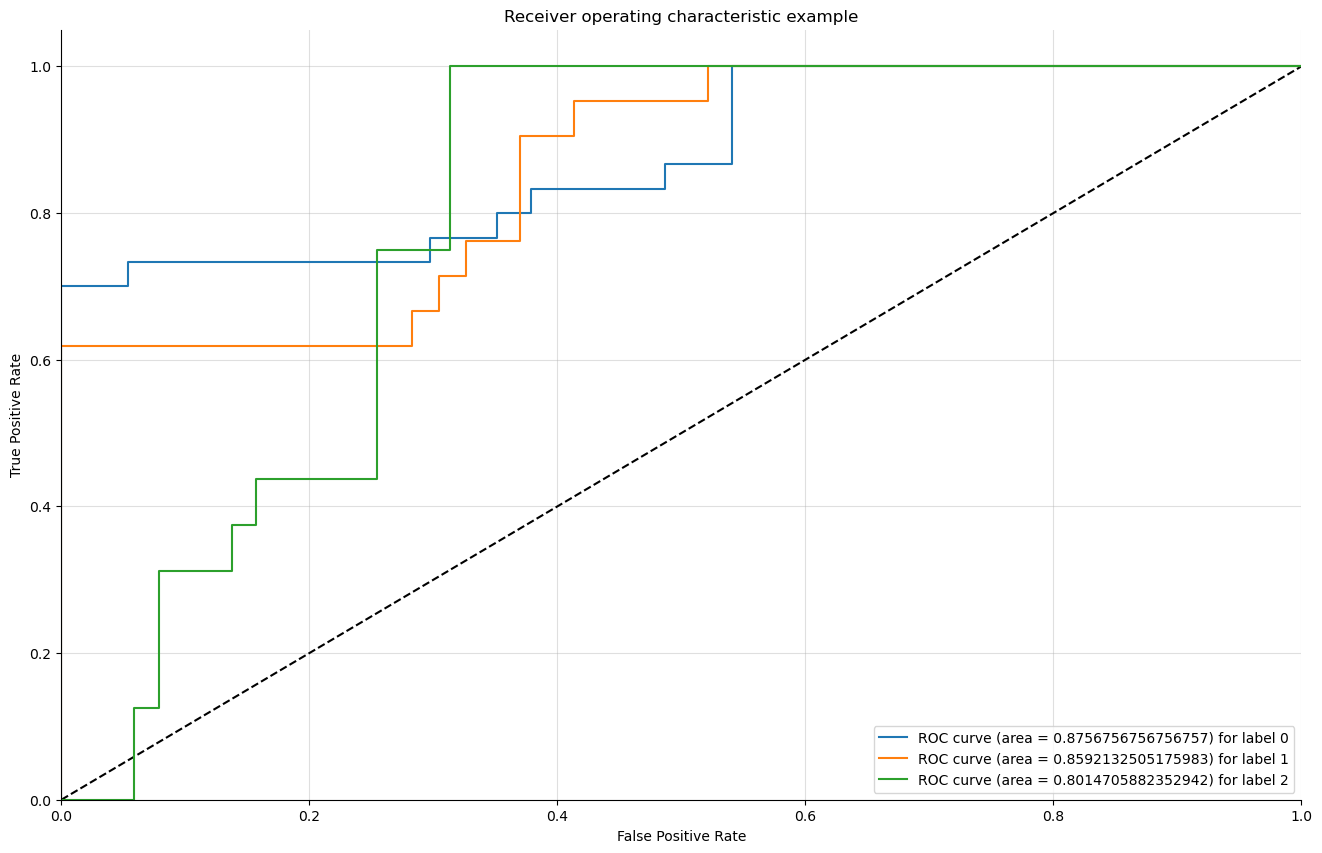

In [20]:
plot_multiclass_roc(grid_model, X_test, y_test, n_classes=3, figsize=(16, 10))